# Task 2: Implementing Brain Tumor detection using Data Science

### *Importing libraries used*

In [1]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### *Importing all the labeled photo files from the given directory*

In [2]:
root_dir = 'brain_tumor_dataset'
image_paths = []
labels = []

In [3]:
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    if os.path.isdir(folder_path):
        label = folder
        for filename in os.listdir(folder_path):
            if filename.lower().endswith(".jpg") or filename.lower().endswith(".jpeg") or filename.lower().endswith(".png"):
                image_path = os.path.join(folder_path, filename)
                image_paths.append(image_path)
                labels.append(label)

### *First 5 photos found*

In [4]:
np.array(image_paths)
image_paths[:5]

['brain_tumor_dataset\\no\\1 no.jpeg',
 'brain_tumor_dataset\\no\\10 no.jpg',
 'brain_tumor_dataset\\no\\11 no.jpg',
 'brain_tumor_dataset\\no\\12 no.jpg',
 'brain_tumor_dataset\\no\\13 no.jpg']

### *Encoding "Yes" and "No" labels to 1 and 0 respectively*

In [5]:
labels = np.array([1 if i == "yes" else 0 for i in labels])
labels[:5]

array([0, 0, 0, 0, 0])

### *Rezising each image to the size 200 x 200 and converting them into numpy arrays*

In [6]:
imgs = []
for i in image_paths:
    image = cv2.imread(i)
    desired_shape = (200, 200)
    resized_image = cv2.resize(image, desired_shape)
    image_array = np.array(resized_image)
    imgs.append(image_array)

In [7]:
imgs[0].shape

(200, 200, 3)

### *Splitting the photos and their label data into training and testing data*

In [8]:
X_train, X_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.2, random_state=1)

### *Creating a Neural Network model mainly comprising of 2 dimensional convolution layers with a dense layer at the end*

In [9]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(200, 200, 3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout (0.25))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout (0.25))
model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid' ))
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam' ,metrics=[ 'accuracy' ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 98, 98, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                    

In [11]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((202, 200, 200, 3), (202,), (51, 200, 200, 3), (51,))

### *Training the model with the train data*

In [12]:
history = model.fit(X_train, y_train, epochs=20, batch_size=20)

Epoch 1/20
11/11 [==============================] - 11s 882ms/step - loss: 27.1970 - accuracy: 0.4752
Epoch 2/20
11/11 [==============================] - 10s 922ms/step - loss: 0.6828 - accuracy: 0.6337
Epoch 3/20
11/11 [==============================] - 10s 894ms/step - loss: 0.6381 - accuracy: 0.7277
Epoch 4/20
11/11 [==============================] - 10s 912ms/step - loss: 0.5677 - accuracy: 0.7376
Epoch 5/20
11/11 [==============================] - 11s 989ms/step - loss: 0.5720 - accuracy: 0.7574
Epoch 6/20
11/11 [==============================] - 10s 881ms/step - loss: 0.5354 - accuracy: 0.7723
Epoch 7/20
11/11 [==============================] - 10s 900ms/step - loss: 0.5176 - accuracy: 0.7822
Epoch 8/20
11/11 [==============================] - 11s 996ms/step - loss: 0.4959 - accuracy: 0.7772
Epoch 9/20
11/11 [==============================] - 10s 925ms/step - loss: 0.5014 - accuracy: 0.7723
Epoch 10/20
11/11 [==============================] - 10s 919ms/step - loss: 0.4905 - accur

### *Accuracy and loss of the above training run*

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

2/2 [==============================] - 1s 203ms/step - loss: 0.6658 - accuracy: 0.7451
Loss: 0.6658202409744263
Accuracy: 0.7450980544090271


### *Testing with a "Yes" labeled image*

(200, 200, 3)

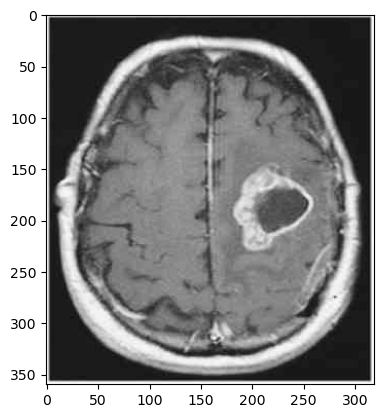

In [14]:
image = cv2.imread('brain_tumor_dataset\\yes\\Y10.jpg')
plt.imshow(image)
resized_image = cv2.resize(image, (200, 200))
image_array = np.array(resized_image)
image_array.shape

In [15]:
image_array = np.expand_dims(image_array, axis=0)
predictions = model.predict(image_array)

1/1 [==============================] - 0s 334ms/step


In [16]:
print(predictions[0][0])

0.99930215


#### The above result is close to 1, which shows that the prediction is "Yes"

### *Testing with a "No" labeled image*

(200, 200, 3)

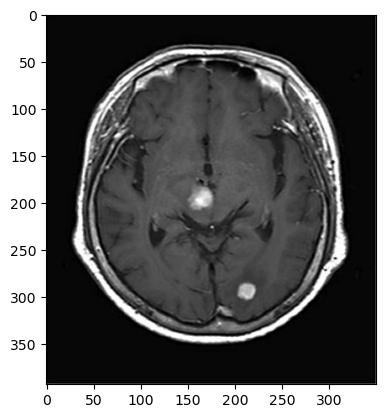

In [17]:
image = cv2.imread('brain_tumor_dataset\\no\\N17.jpg')
plt.imshow(image)
resized_image = cv2.resize(image, (200, 200))
image_array = np.array(resized_image)
image_array.shape

In [18]:
image_array = np.expand_dims(image_array, axis=0)
predictions = model.predict(image_array)

1/1 [==============================] - 0s 47ms/step


In [19]:
print(predictions[0][0])

0.30344683


#### The above result is close to 0 which shows that the prediction is "No"